<a href="https://colab.research.google.com/github/LeDongAnhKiet/World_Happiness_Report/blob/main/World_Happiness_Report_Undone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Mô tả dữ liệu**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Đọc dữ liệu từ các file csv
files = ['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv']
dfs = []
for f in files:
  path = '/content/drive/MyDrive/Colab Notebooks/Dataset/World Happiness Report 2015 - 2022/' + f
  df = pd.read_csv(path)
  dfs.append(df)

# Mô tả tổng quan
for i, df in enumerate(dfs):
    nam = files[i].split('.')[0]
    print(f'\tDữ liệu năm {nam}\n')
    print(f'Số lượng hàng: {df.shape[0]}')
    print(f'Số lượng cột: {df.shape[1]}')
    print(f'Các cột: {df.columns.tolist()}')
    print(f'Mô tả tổng quan: \n{df.describe()}\n')
    print('\t------------------------------------------------------------------------------------------------------------------------\n')

	Dữ liệu năm 2015

Số lượng hàng: 158
Số lượng cột: 12
Các cột: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Mô tả tổng quan: 
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.84

## **Tiền xử lý dữ liệu**

In [ ]:
# Đổi tên các tên cột sao cho các file có cùng tên cột
dfs[2] = dfs[2].rename(columns = { 'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score',
                                    'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                    'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual' })

dfs[3] = dfs[3].rename(columns = { 'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                    'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                    'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom',
                                    'Perceptions of corruption' : 'Trust (Government Corruption)' })

dfs[4] = dfs[4].rename(columns = { 'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                    'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                    'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                    'Perceptions of corruption' : 'Trust (Government Corruption)' })

dfs[5] = dfs[5].rename(columns = { 'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 'Regional indicator' : 'Region',
                                    'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                    'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom',
                                    'Perceptions of corruption' : 'Trust (Government Corruption)' })

dfs[6] = dfs[6].rename(columns = { 'Country name': 'Country','Ladder score' : 'Happiness Score',  'Logged GDP per capita' : 'Economy (GDP per Capita)',
                                    'Social support' : 'Family' , 'Healthy life expectancy' : 'Health (Life Expectancy)', 'Regional indicator' : 'Region',
                                    'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)' })

dfs[7] = dfs[7].rename(columns = { 'RANK':'Happiness Rank' ,'Happiness score':'Happiness Score',
                                    'Explained by: GDP per capita' : 'Economy (GDP per Capita)', 'Explained by: Social support' : 'Family',
                                    'Explained by: Healthy life expectancy' : 'Health (Life Expectancy)', 'Explained by: Freedom to make life choices' : 'Freedom',
                                    'Explained by: Perceptions of corruption' : 'Trust (Government Corruption)', 'Explained by: Generosity': 'Generosity' })

In [ ]:
for i, df in enumerate(dfs):
  # Thêm cột year vào các df
  nam = files[i].split('.')[0]
  df['Year'] = nam
  # Xuất các năm có giá trị rỗng hoặc thiếu
  if (df.isnull().sum().sum() != 0):
    print (f'Năm {nam} thiếu dữ liệu {df.isnull().sum().sum()} ô')

# Xóa các giá trị rỗng hoặc thiếu đó
dfs[3] = dfs[3].dropna(axis = 0)
dfs[7] = dfs[7].dropna(axis = 0)

# Đếm các quốc gia có trong các năm
for i, df in enumerate(dfs):
  nam = files[i].split('.')[0]
  print (f'Năm {nam} có {len(df)} quốc gia')

Năm 2018 thiếu dữ liệu 1 ô
Năm 2022 thiếu dữ liệu 10 ô
Năm 2015 có 158 quốc gia
Năm 2016 có 157 quốc gia
Năm 2017 có 155 quốc gia
Năm 2018 có 155 quốc gia
Năm 2019 có 156 quốc gia
Năm 2020 có 153 quốc gia
Năm 2021 có 149 quốc gia
Năm 2022 có 146 quốc gia


In [ ]:
# Chuẩn hóa dữ liệu
dfs[5].reset_index(inplace=True)
dfs[5].rename(columns={'index': 'Happiness Rank'}, inplace=True)
dfs[5]['Happiness Rank'] = dfs[5]['Happiness Rank'] + 1

dfs[6].reset_index(inplace=True)
dfs[6].rename(columns={'index': 'Happiness Rank'}, inplace=True)
dfs[6]['Happiness Rank'] = dfs[6]['Happiness Rank'] + 1

dfs[7]['Happiness Score'] = dfs[7]['Happiness Score'].str.replace(',', '.').astype(float)
dfs[7]['Whisker-high'] = dfs[7]['Whisker-high'].str.replace(',', '.').astype(float)
dfs[7]['Whisker-low'] = dfs[7]['Whisker-low'].str.replace(',', '.').astype(float)
dfs[7]['Dystopia (1.83) + residual'] = dfs[7]['Dystopia (1.83) + residual'].str.replace(',', '.').astype(float)
dfs[7]['Economy (GDP per Capita)'] = dfs[7]['Economy (GDP per Capita)'].str.replace(',', '.').astype(float)
dfs[7]['Family'] = dfs[7]['Family'].str.replace(',', '.').astype(float)
dfs[7]['Health (Life Expectancy)'] = dfs[7]['Health (Life Expectancy)'].str.replace(',', '.').astype(float)
dfs[7]['Freedom'] = dfs[7]['Freedom'].str.replace(',', '.').astype(float)
dfs[7]['Generosity'] = dfs[7]['Generosity'].str.replace(',', '.').astype(float)
dfs[7]['Trust (Government Corruption)'] = dfs[7]['Trust (Government Corruption)'].str.replace(',', '.').astype(float)

In [ ]:
df_all = pd.concat(dfs)
df_all = df_all[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                  'Family', 'Health (Life Expectancy)', 'Freedom',
                  'Trust (Government Corruption)', 'Generosity', 'Year']]
df_all[df_all['Happiness Rank'] <= 5].sort_values(by = ['Happiness Rank', 'Year'], ascending=True)

Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland               1           7.5870                  1.396510   
0      Denmark               1           7.5260                  1.441780   
0       Norway               1           7.5370                  1.616463   
0      Finland               1           7.6320                  1.305000   
0      Finland               1           7.7690                  1.340000   
0      Finland               1           7.8087                 10.639267   
0      Finland               1           7.8420                 10.775000   
0      Finland               1           7.8210                  1.892000   
1      Iceland               2           7.5610                  1.302320   
1  Switzerland               2           7.5090                  1.527330   
1      Denmark               2           7.5220                  1.482383   
1       Norway               2           7.5940                  1.456000   
1      Denmark               2           7.6000                  1.383000   
1      Denmark               2           7.6456                 10.774001   
1      Denmark               2           7.6200                 10.933000   
1      Denmark               2           7.6360                  1.953000   
2      Denmark               3           7.5270                  1.325480   
2      Iceland               3           7.5010                  1.426660   
2      Iceland               3           7.5040                  1.480633   
2      Denmark               3           7.5550                  1.351000   
2       Norway               3           7.5540                  1.488000   
2  Switzerland               3           7.5599                 10.979933   
2  Switzerland               3           7.5710                 11.117000   
2      Iceland               3           7.5570                  1.936000   
3       Norway               4           7.5220                  1.459000   
3       Norway               4           7.4980                  1.577440   
3  Switzerland               4           7.4940                  1.564980   
3      Iceland               4           7.4950                  1.343000   
3      Iceland               4           7.4940                  1.380000   
3      Iceland               4           7.5045                 10.772559   
3      Iceland               4           7.5540                 10.878000   
3  Switzerland               4           7.5120                  2.026000   
4       Canada               5           7.4270                  1.326290   
4      Finland               5           7.4130                  1.405980   
4      Finland               5           7.4690                  1.443572   
4  Switzerland               5           7.4870                  1.420000   
4  Netherlands               5           7.4880                  1.396000   
4       Norway               5           7.4880                 11.087804   
4  Netherlands               5           7.4640                 10.932000   
4  Netherlands               5           7.4150                  1.945000   

     Family  Health (Life Expectancy)   Freedom  \
0  1.349510                  0.941430  0.665570   
0  1.163740                  0.795040  0.579410   
0  1.533524                  0.796667  0.635423   
0  1.592000                  0.874000  0.681000   
0  1.587000                  0.986000  0.596000   
0  0.954330                 71.900825  0.949172   
0  0.954000                 72.000000  0.949000   
0  1.258000                  0.775000  0.736000   
1  1.402230                  0.947840  0.628770   
1  1.145240                  0.863030  0.585570   
1  1.551122                  0.792566  0.626007   
1  1.582000                  0.861000  0.686000   
1  1.573000                  0.996000  0.592000   
1  0.955991                 72.402504  0.951444   
1  0.954000                 72.700000  0.946000   
1  1.243000                  0.77

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# 1 cách khác tiền xử lý dữ liệu
for i, df in enumerate(dfs):
    print(f"\n\t------ Năm {2015 + i} ------\n")

    # Xử lý giá trị thiếu (nếu có) chỉ cho các cột chứa dữ liệu số
    numeric_columns = df.select_dtypes(include = ['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Chuẩn hóa dữ liệu (nếu cần)
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Lưu DataFrame đã tiền xử lý vào dictionary
    dfs[i] = df
    print(dfs[i])


	------ Năm 2015 ------

         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe       -1.721000   
1        Iceland                   Western Europe       -1.699075   
2        Denmark                   Western Europe       -1.677149   
3         Norway                   Western Europe       -1.655224   
4         Canada                    North America       -1.633299   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa        1.633576   
154        Benin               Sub-Saharan Africa        1.655501   
155        Syria  Middle East and Northern Africa        1.677427   
156      Burundi               Sub-Saharan Africa        1.699352   
157         Togo               Sub-Saharan Africa        1.721277   

     Happiness Score  Standard Error  Economy (GDP per Capita)    Family  \
0           1.937360       -0.805926                  1.369621  1.320

## **Phân tích dữ liệu**

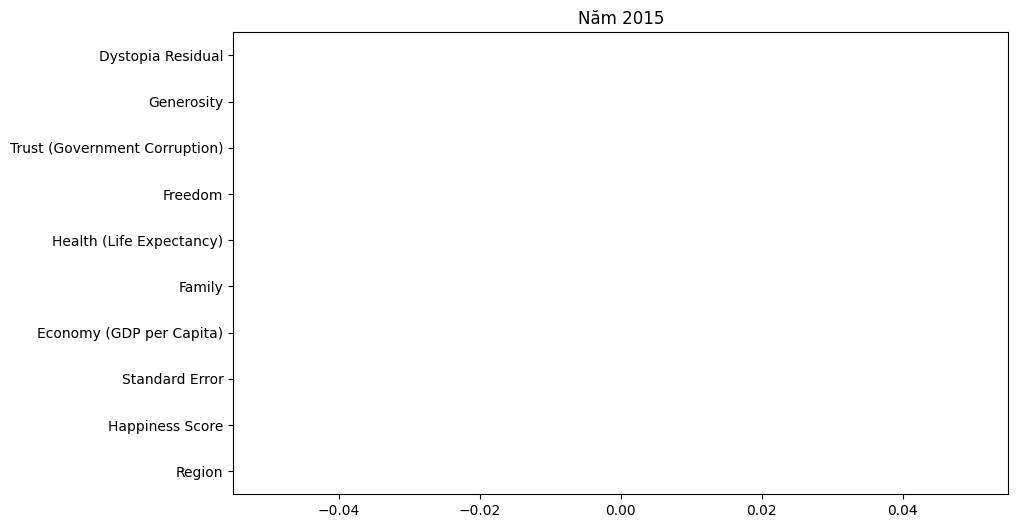

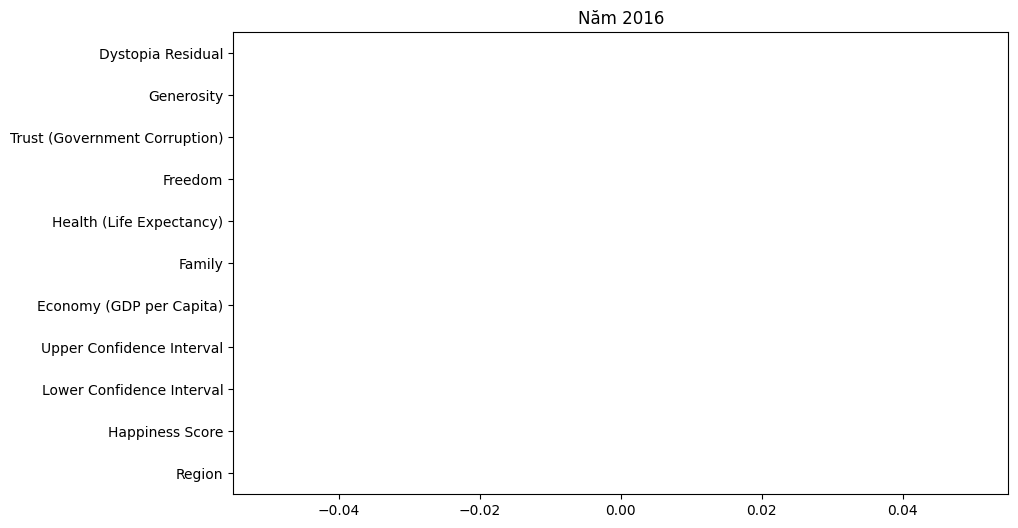

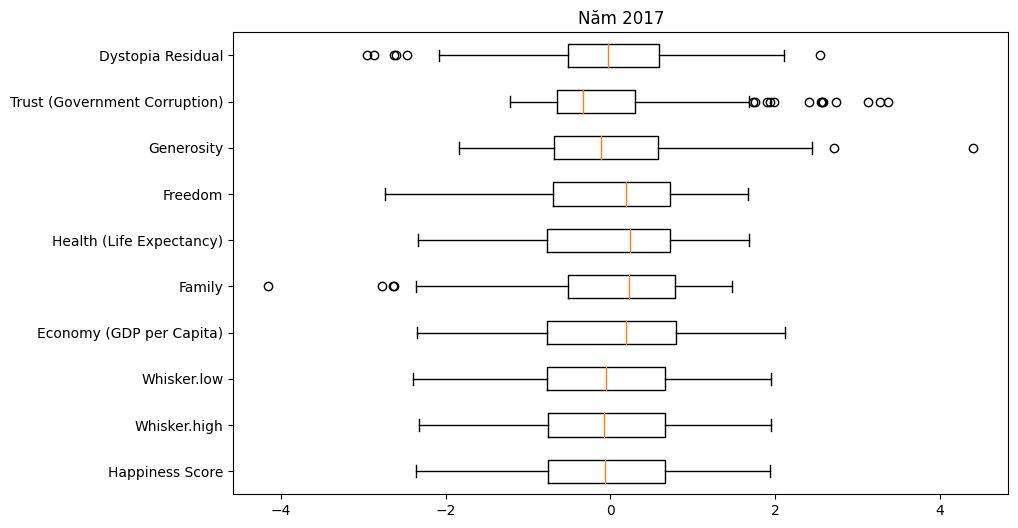

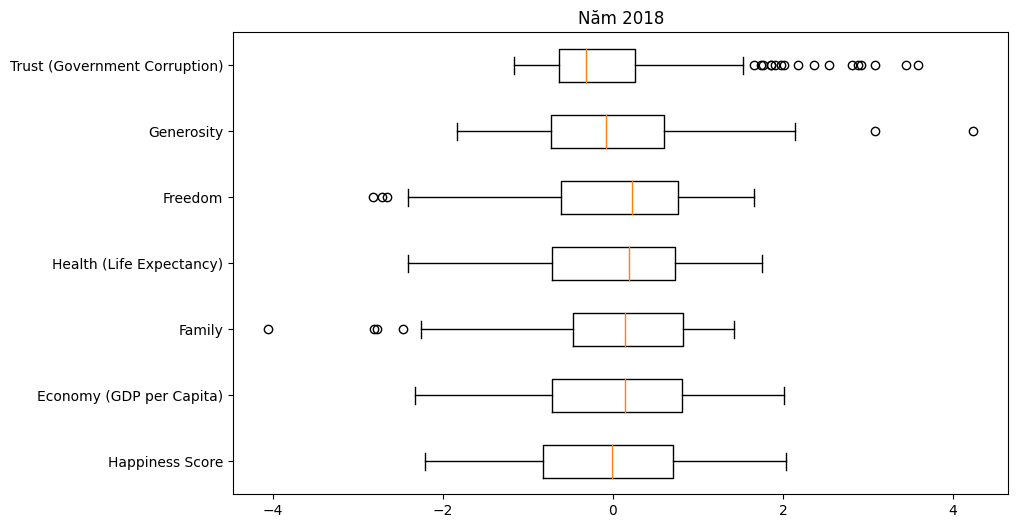

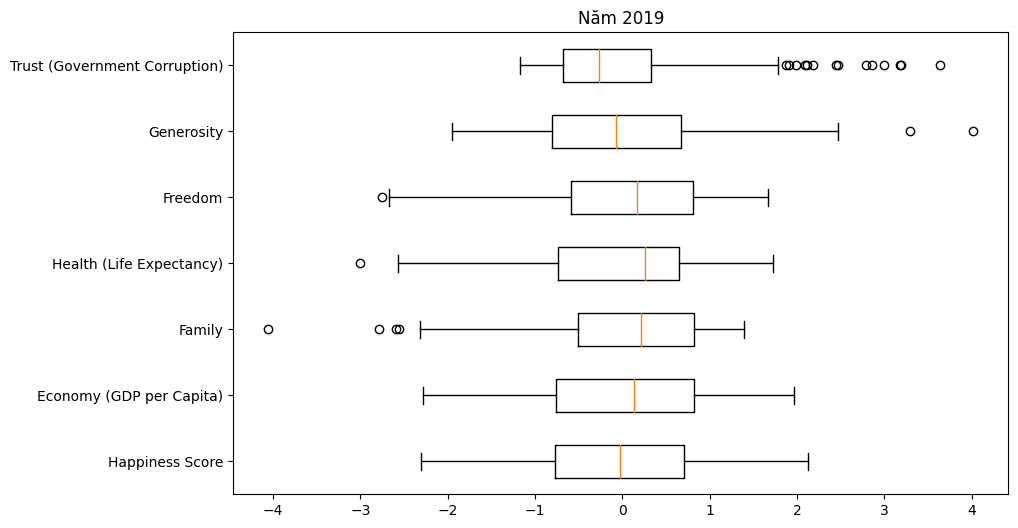

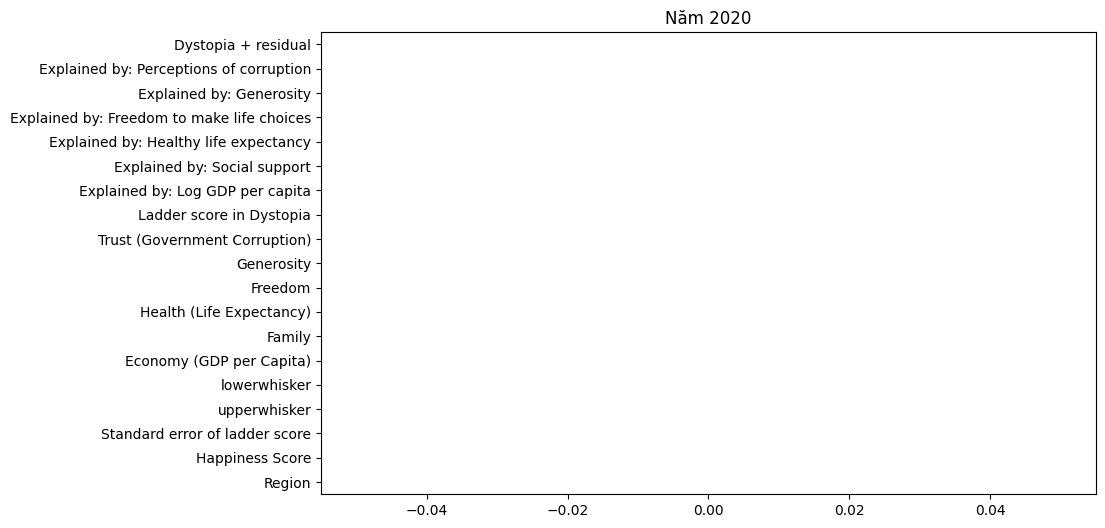

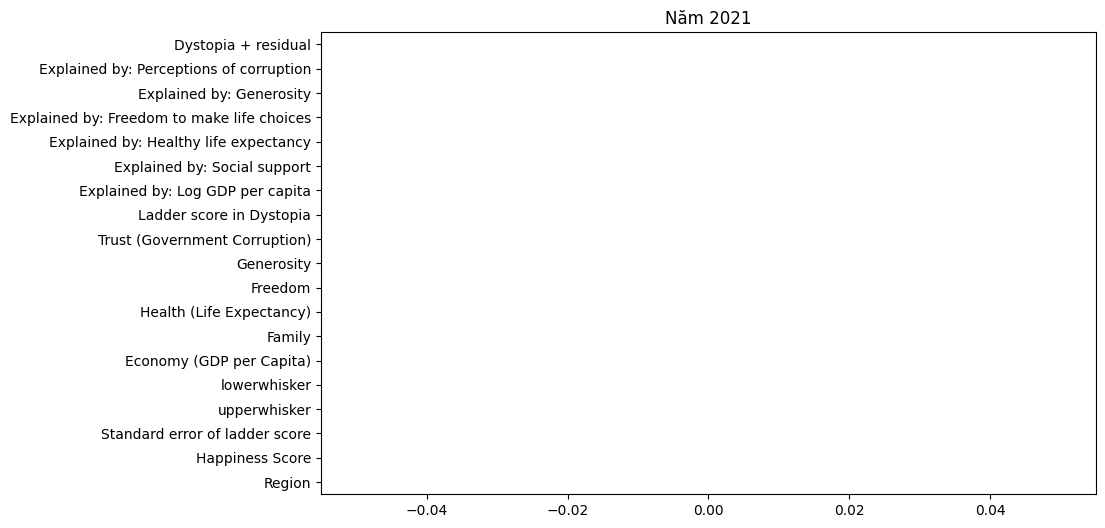

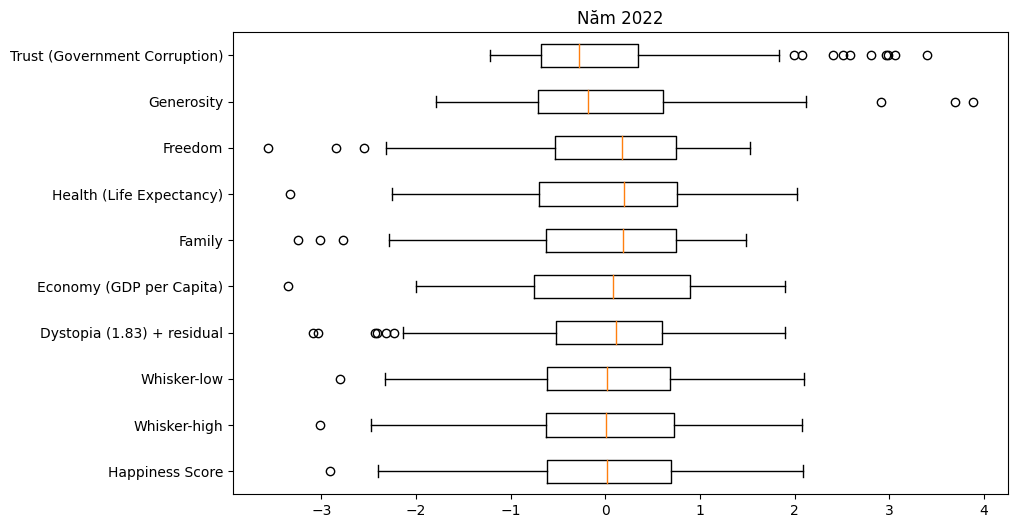

In [ ]:
for i, df in enumerate(dfs):
    # Loại bỏ cột không cần thiết (nếu có)
    df = df.drop(['Country', 'Year', 'Happiness Rank'], axis = 1)
    # Xử lý giá trị không hợp lệ (nếu có)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = 'coerce')
    # Loại bỏ hàng có giá trị không hợp lệ (nếu có)
    df = df.dropna()
    # Vẽ boxplot phân tích giá trị ngoại lai (Outliers)
    # Biểu đồ hộp: https://chidokun.github.io/2021/02/box-and-whisker-plot/
    plt.figure(figsize=(10, 6))
    plt.boxplot(df.values, vert=False, labels=df.columns)
    plt.title(f'Năm {2015 + i}')
    plt.show()

In [ ]:
# Tần suất xuất hiện từng yếu tố
for i, df in enumerate(dfs):
    print(f"------ Tần suất xuất hiện từng yếu tố năm {2015 + i} ------")
    for column in df.columns[2:8]:  # Bỏ qua Country và Year
        print(df[column].value_counts())

# Sự tương quan giữa các yếu tố
for i, df in enumerate(dfs):
    print(f"------ Sự tương quan giữa các yếu tố năm {2015 + i} ------")
    correlation_matrix = df.corr()
    print(correlation_matrix)

------ Tần suất xuất hiện từng yếu tố năm 2015 ------
 0.054952    2
-1.721000    1
 0.668861    1
 0.515384    1
 0.537309    1
            ..
-0.558957    1
-0.537032    1
-0.515107    1
-0.493181    1
 1.721277    1
Name: Happiness Rank, Length: 157, dtype: int64
-0.160975    2
 1.937360    1
-0.604298    1
-0.470250    1
-0.504419    1
            ..
 0.419900    1
 0.413767    1
 0.400625    1
 0.396244    1
-2.222513    1
Name: Happiness Score, Length: 157, dtype: int64
-0.590033    2
-0.607000    2
-0.230797    2
 0.153597    2
 0.085143    2
            ..
-0.394618    1
-0.314463    1
-0.553173    1
 0.340821    1
 1.134182    1
Name: Standard Error, Length: 153, dtype: int64
 1.369621    1
-1.116374    1
 0.766276    1
 0.446699    1
 0.683856    1
            ..
 0.687838    1
 0.843222    1
 0.749280    1
-0.629318    1
-1.586334    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64
 1.320281    1
-2.062519    1
-0.227310    1
-0.703616    1
 0.777531    1
        

<ipython-input-9-48f7c5407b05>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
<ipython-input-9-48f7c5407b05>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
<ipython-input-9-48f7c5407b05>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
<ipython-input-9-48f7c5407b05>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will

                                            Happiness Rank  Happiness Score  \
Happiness Rank                                    1.000000        -0.985263   
Happiness Score                                  -0.985263         1.000000   
Standard error of ladder score                    0.437748        -0.446443   
upperwhisker                                     -0.984915         0.999577   
lowerwhisker                                     -0.984802         0.999601   
Economy (GDP per Capita)                         -0.777302         0.775374   
Family                                           -0.749488         0.765001   
Health (Life Expectancy)                         -0.769746         0.770316   
Freedom                                          -0.583441         0.590597   
Generosity                                       -0.044922         0.069043   
Trust (Government Corruption)                     0.394355        -0.418305   
Ladder score in Dystopia                            

<ipython-input-9-48f7c5407b05>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<ipython-input-10-47e98f410106>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, linespacing=1.5)


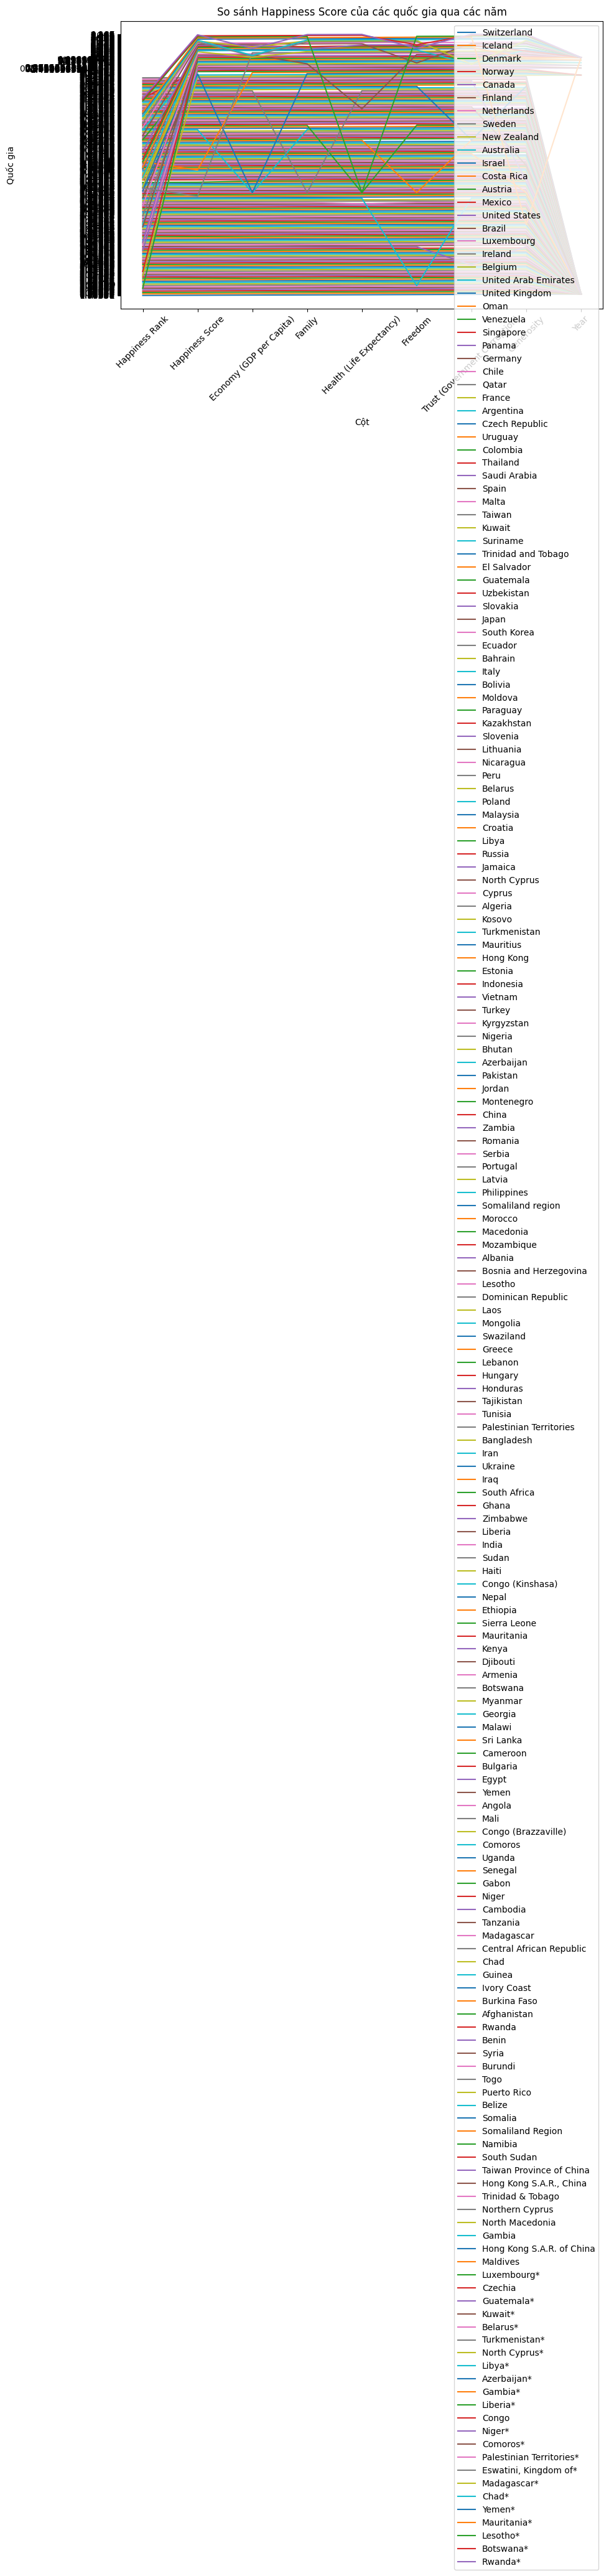

In [ ]:
# So sánh các năm
years = df_all.columns[1:]  # Bỏ cột 'Country'
countries = df_all['Country'].unique()

plt.figure(figsize=(10, 6))

for country in countries:
    happiness_scores = []
    for year in years:
        score = df_all[df_all['Country'] == country][year].values[0]
        happiness_scores.append(score)
    plt.plot(years, happiness_scores, label=country)
plt.xlabel('Cột')
plt.ylabel('Quốc gia', linespacing=1.5)
plt.title('So sánh Happiness Score của các quốc gia qua các năm')
ax = plt.gca()
labels = ax.get_yticklabels()
ax.set_yticklabels(labels, linespacing=1.5)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Phân tích theo từng khu vực địa lý
for i, df in enumerate(dfs):
    if 'Region' in df.columns:
      print(f"------ Phân tích theo từng khu vực địa lý năm {2015 + i} ------")
      regions = df['Region'].unique()
      for region in regions:
        region_data = df[df['Region'] == region]
        print(f"Khu vực {region}:")
        print(region_data.describe())

------ Phân tích theo từng khu vực địa lý năm 2015 ------
Khu vực Western Europe:
       Happiness Rank  Happiness Score  Standard Error  \
count       21.000000        21.000000       21.000000   
mean        -1.095606         1.151136       -0.600258   
std          0.641728         0.722442        0.593519   
min         -1.721000        -0.454479       -1.720398   
25%         -1.589448         0.811531       -0.854487   
50%         -1.326344         1.367874       -0.698272   
75%         -0.931688         1.754249       -0.340791   
max          0.493459         1.937360        0.495281   

       Economy (GDP per Capita)     Family  Health (Life Expectancy)  \
count                 21.000000  21.000000                 21.000000   
mean                   1.125958   0.943832                  1.132338   
std                    0.239748   0.497946                  0.108950   
min                    0.766276  -0.360456                  0.992229   
25%                    0.955529   0

## **Gom cụm dữ liệu**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, r2_score

In [ ]:
# Phân loại hoặc gom cụm dữ liệu
def cluster_data(df, num_clusters):
    if 'Region' in df.columns:
        df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)
        features = df_encoded.drop(['Country'], axis=1)
    else:
        features = df.drop(['Country'], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_features)
    return df

# Sự ảnh hưởng từng yếu tố
def linear_regression(df, target, predictors):
    X = df[predictors]
    y = df[target]
    model = LinearRegression()
    model.fit(X, y)
    return model

------ Sự tương quan giữa các mục tiêu năm 2015 ------


<ipython-input-14-bc00445de336>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


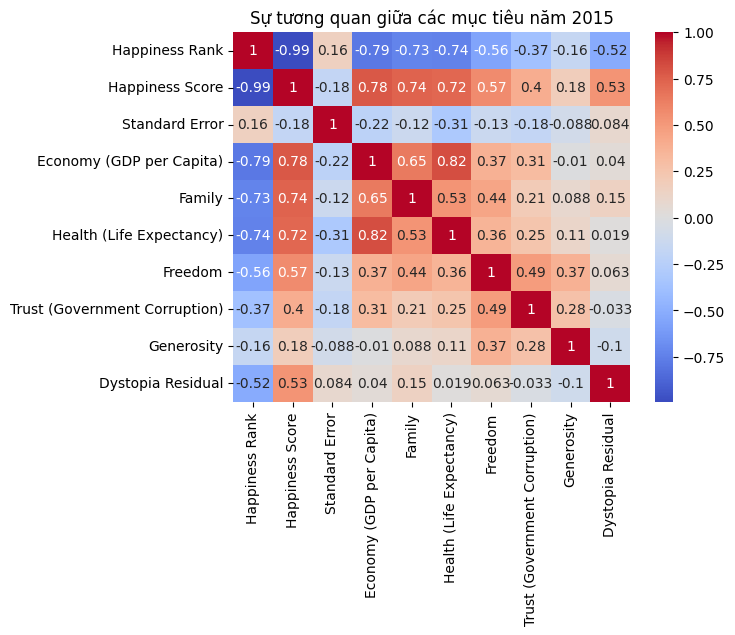

------ Sự tương quan giữa các mục tiêu năm 2016 ------


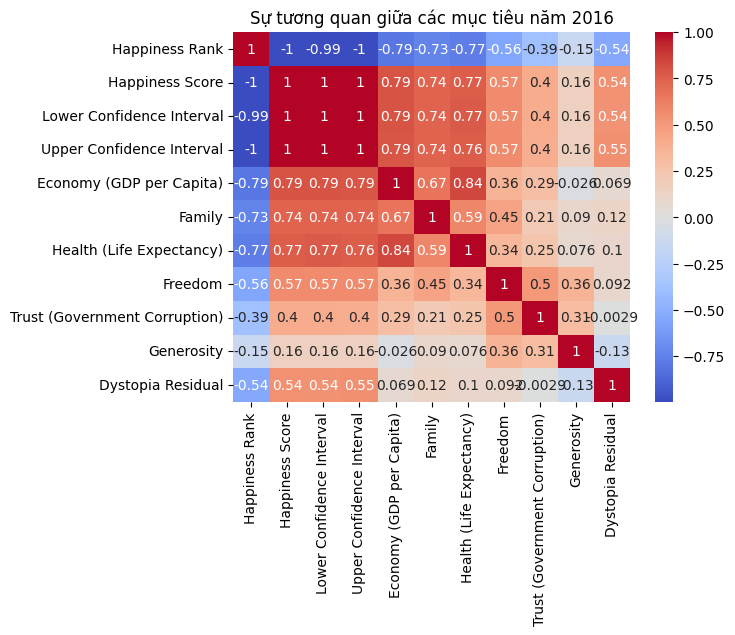

------ Sự tương quan giữa các mục tiêu năm 2017 ------


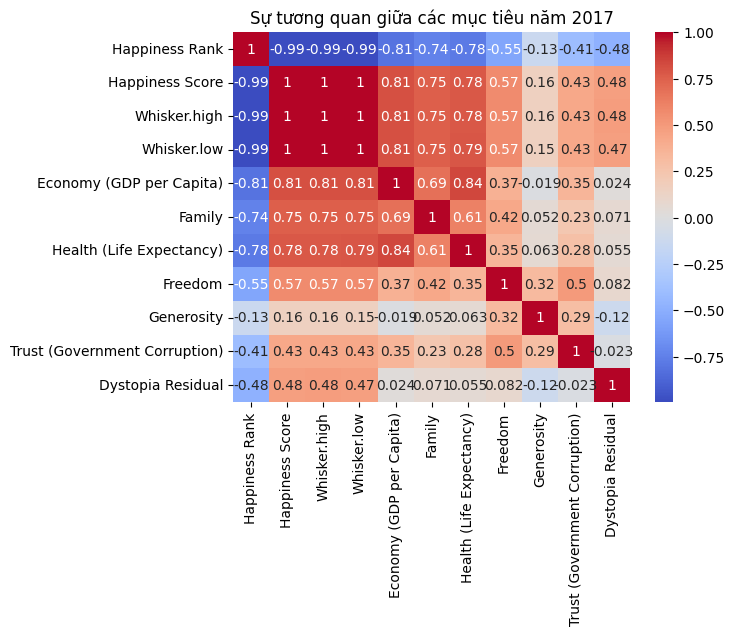

------ Sự tương quan giữa các mục tiêu năm 2018 ------


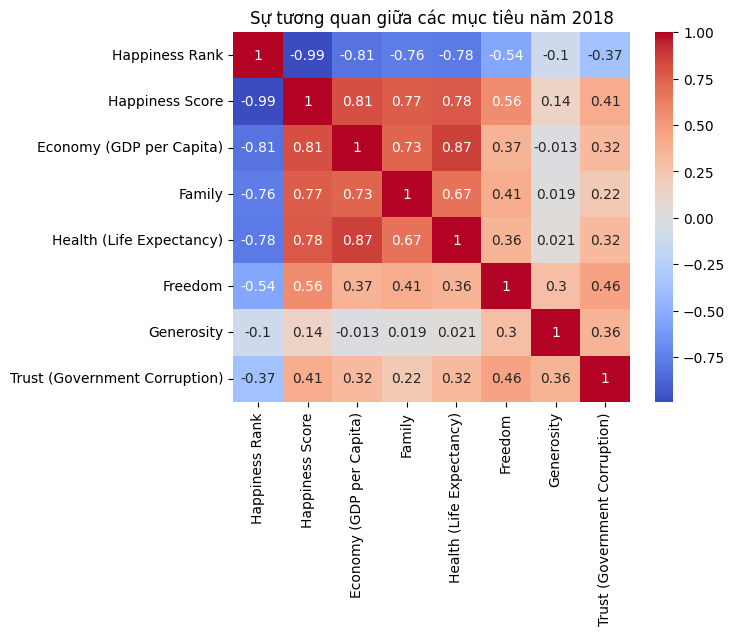

------ Sự tương quan giữa các mục tiêu năm 2019 ------


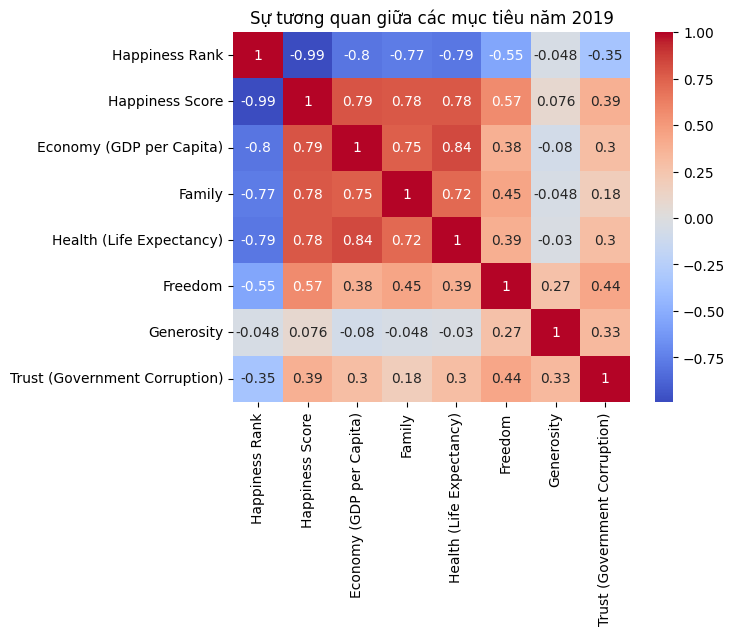

------ Sự tương quan giữa các mục tiêu năm 2020 ------


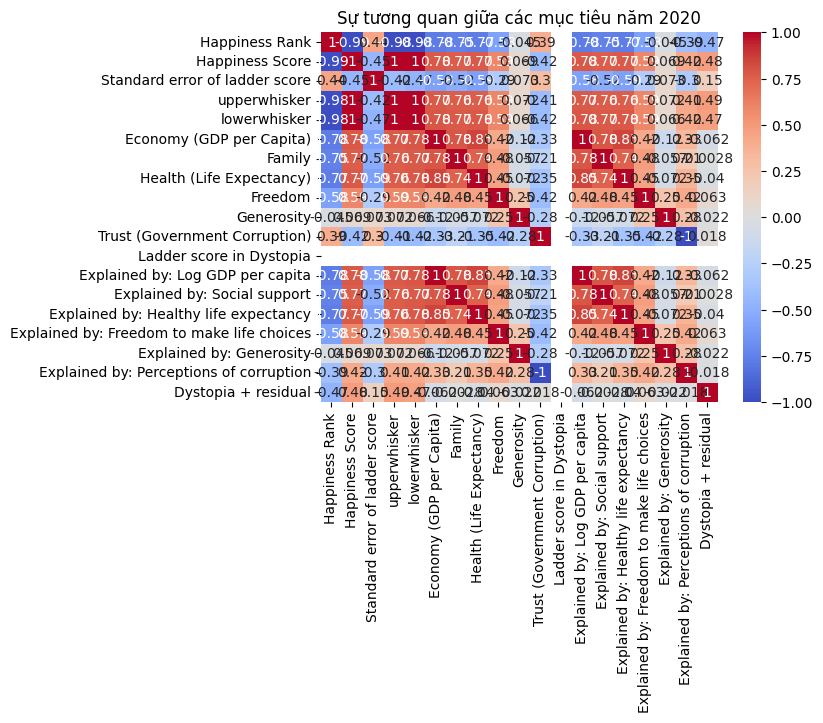

------ Sự tương quan giữa các mục tiêu năm 2021 ------


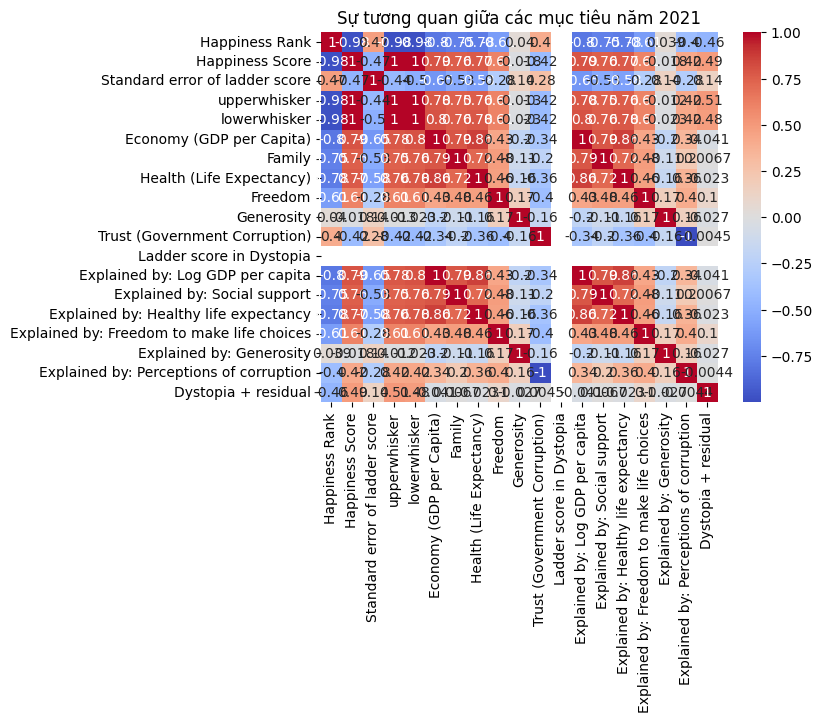

------ Sự tương quan giữa các mục tiêu năm 2022 ------


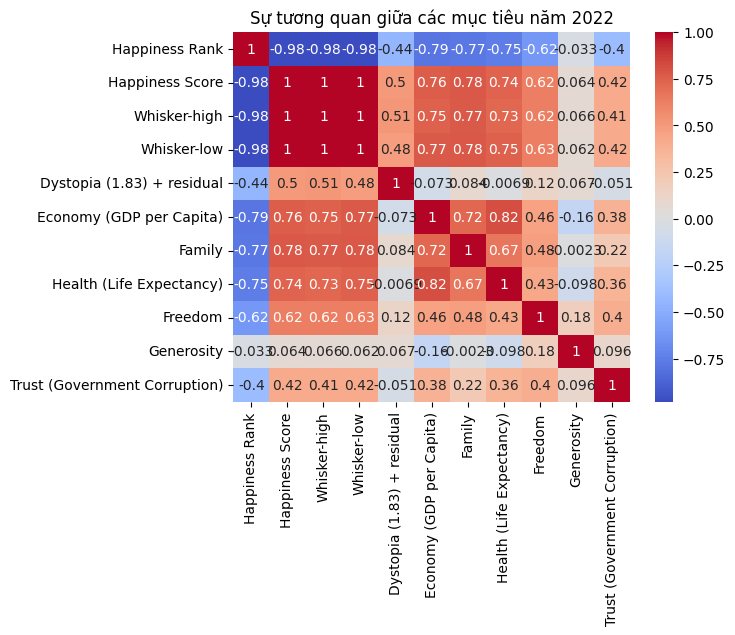

In [ ]:
# Sự tương quan giữa các mục tiêu
for i, df in enumerate(dfs):
    print(f"------ Sự tương quan giữa các mục tiêu năm {2015 + i} ------")
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Sự tương quan giữa các mục tiêu năm {2015 + i}")
    plt.show()

In [ ]:
# Gọi hàm cluster_data với số cụm mong muốn (ví dụ: 5 cụm)
num_clusters = 5
for i, df in enumerate(dfs):
  print(f"------ Phân loại dữ liệu năm {2015 + i} ------")
  df = cluster_data(df, num_clusters)
  print(df[['Country', 'Cluster']])

------ Phân loại dữ liệu năm 2015 ------
         Country  Cluster
0    Switzerland        2
1        Iceland        2
2        Denmark        2
3         Norway        2
4         Canada        2
..           ...      ...
153       Rwanda        1
154        Benin        1
155        Syria        1
156      Burundi        1
157         Togo        1

[158 rows x 2 columns]
------ Phân loại dữ liệu năm 2016 ------
         Country  Cluster
0        Denmark        1
1    Switzerland        1
2        Iceland        1
3         Norway        1
4        Finland        1
..           ...      ...
152        Benin        0
153  Afghanistan        0
154         Togo        0
155        Syria        0
156      Burundi        0

[157 rows x 2 columns]
------ Phân loại dữ liệu năm 2017 ------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                      Country  Cluster
0                      Norway        4
1                     Denmark        4
2                     Iceland        4
3                 Switzerland        4
4                     Finland        4
..                        ...      ...
150                    Rwanda        0
151                     Syria        2
152                  Tanzania        0
153                   Burundi        2
154  Central African Republic        2

[155 rows x 2 columns]
------ Phân loại dữ liệu năm 2018 ------
                      Country  Cluster
0                     Finland        1
1                      Norway        1
2                     Denmark        1
3                     Iceland        1
4                 Switzerland        1
..                        ...      ...
151                     Yemen        4
152                  Tanzania        3
153               South Sudan        4
154  Central African Republic        4
155                   Burundi        4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                      Country  Cluster
0                     Finland        3
1                     Denmark        3
2                      Norway        3
3                     Iceland        3
4                 Netherlands        3
..                        ...      ...
151                    Rwanda        2
152                  Tanzania        2
153               Afghanistan        2
154  Central African Republic        2
155               South Sudan        2

[156 rows x 2 columns]
------ Phân loại dữ liệu năm 2020 ------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                      Country  Cluster
0                     Finland        2
1                     Denmark        2
2                 Switzerland        2
3                     Iceland        2
4                      Norway        2
..                        ...      ...
148  Central African Republic        3
149                    Rwanda        3
150                  Zimbabwe        3
151               South Sudan        3
152               Afghanistan        3

[153 rows x 2 columns]
------ Phân loại dữ liệu năm 2021 ------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Country  Cluster
0        Finland        3
1        Denmark        3
2    Switzerland        3
3        Iceland        3
4    Netherlands        3
..           ...      ...
144      Lesotho        2
145     Botswana        1
146       Rwanda        2
147     Zimbabwe        2
148  Afghanistan        2

[149 rows x 2 columns]
------ Phân loại dữ liệu năm 2022 ------
         Country  Cluster
0        Finland        3
1        Denmark        3
2        Iceland        3
3    Switzerland        3
4    Netherlands        3
..           ...      ...
141    Botswana*        0
142      Rwanda*        0
143     Zimbabwe        0
144      Lebanon        0
145  Afghanistan        0

[146 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
target_column = 'Happiness Score'
for i, df in enumerate(dfs):
      # Bỏ qua 'Country', 'Region'
    if 'Region' in df.columns:
        df_encoded = pd.get_dummies(df, columns=['Region'], drop_first = True)
        df = df_encoded.drop(['Country', 'Year', 'Cluster'], axis = 1)
    else:
        df = df.drop(['Country', 'Year', 'Cluster'], axis = 1)
    print(f"------ Sự ảnh hưởng từng yếu tố năm {2015 + i} ------")
    predictors = df.columns
    model = linear_regression(df, target_column, predictors)

    for feature, coef in zip(predictors, model.coef_):
        print(f"{feature}: {coef}")
    print(f"Điểm chính xác (R-squared) cho năm {2015 + i}: ",
      # dữ liệu huấn luyện
      f"{model.score(df[predictors], df[target_column])}",
      # dữ liệu thực tế
      f"; {r2_score(df[target_column], model.predict(df[predictors]))}\n")

    # plt.figure(figsize = (10, 6))
    # plt.bar(predictors, model.coef_)
    # plt.xlabel('Predictors')
    # plt.ylabel('Coefficient')
    # plt.title(f'Regression coefficients for {2015 + i}')
    # plt.xticks(rotation = 45)
    # plt.legend()
    # plt.tight_layout()
    # plt.show()

------ Sự ảnh hưởng từng yếu tố năm 2015 ------
Happiness Rank: -5.994286412182037e-16
Happiness Score: 0.9999999999999545
Standard Error: 1.942874904600099e-16
Economy (GDP per Capita): 1.513738299319267e-14
Family: 9.911809792319061e-15
Health (Life Expectancy): 8.816974476951601e-15
Freedom: 5.4498351714410464e-15
Trust (Government Corruption): 4.362272026309474e-15
Generosity: 4.7670459310548285e-15
Dystopia Residual: 2.1042324358266493e-14
Region_Central and Eastern Europe: -3.8408821678262086e-16
Region_Eastern Asia: -8.595378289090056e-16
Region_Latin America and Caribbean: -5.053080897225681e-16
Region_Middle East and Northern Africa: -4.588469204629783e-16
Region_North America: -2.8400868814758464e-16
Region_Southeastern Asia: -4.702511706760112e-16
Region_Southern Asia: -3.994439546657093e-16
Region_Sub-Saharan Africa: -4.718447854656915e-16
Region_Western Europe: -6.38378239159465e-16
Điểm chính xác (R-squared) cho năm 2015:  1.0 ; 1.0

------ Sự ảnh hưởng từng yếu tố năm 20

## **Phân loại dữ liệu**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
import graphviz

In [ ]:
X = df_all.drop(['Happiness Score','Happiness Rank','Country','Year'], axis=1 )
df_all.loc[(df_all['Happiness Score'] >=5), 'label']= 'Đạt'
df_all.loc[(df_all['Happiness Score'] < 5), 'label']= 'Không đạt'
y = df_all['label']
X

Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
141                   1.50300  0.81500                   0.28000  0.57100   
142                   0.78500  0.13300                   0.46200  0.62100   
143                   0.94700  0.69000                   0.27000  0.32900   
144                   1.39200  0.49800                   0.63100  0.10300   
145                   0.75800  0.00000                   0.28900  0.00000   

     Trust (Government Corruption)  Generosity  
0                          0.41978     0.29678  
1                          0.14145     0.43630  
2                          0.48357     0.34139  
3                          0.36503     0.34699  
4                          0.32957     0.45811  
..                             ...         ...  
141                        0.10200     0.01200  
142                        0.54400     0.18700  
143                        0.10500     0.10600  
144                        0.03400     0.08200  
145                        0.00500     0.08900  

[1229 rows x 6 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("KNN model evaluation: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN model evaluation: 
[[ 73  17]
 [ 15 141]]
              precision    recall  f1-score   support

   Không đạt       0.83      0.81      0.82        90
         Đạt       0.89      0.90      0.90       156

    accuracy                           0.87       246
   macro avg       0.86      0.86      0.86       246
weighted avg       0.87      0.87      0.87       246



In [ ]:
# Tách dữ liệu
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.2, random_state = 42)
param_grid = {
    'criterion' :['gini','entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}
# Xây dựng cây quyết định
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, param_grid, cv = 5,scoring ='accuracy')
grid_search.fit(X, y)

best_decisionTree =grid_search.best_estimator_
print('Best parameters: ', grid_search.best_params_)
print('Best Accuracy: ', grid_search.best_score_)
#in ra các luật
tree_rules = export_text(best_decisionTree, feature_names = list(train_X.columns))
print("Các luật đánh giá các quốc gia" )
print(tree_rules)

# Vẽ cây quyết định
dot_data = export_graphviz(best_decisionTree,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename='Decisiontree.csv', format ='png', cleanup =True)
graph.view()

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best Accuracy:  0.8510668657706987
Các luật đánh giá các quốc gia
|--- Family <= 0.66
|   |--- Family <= 0.26
|   |   |--- Economy (GDP per Capita) <= 0.55
|   |   |   |--- class: Không đạt
|   |   |--- Economy (GDP per Capita) >  0.55
|   |   |   |--- class: Không đạt
|   |--- Family >  0.26
|   |   |--- Freedom <= 0.16
|   |   |   |--- Freedom <= 0.09
|   |   |   |   |--- class: Không đạt
|   |   |   |--- Freedom >  0.09
|   |   |   |   |--- Health (Life Expectancy) <= 0.38
|   |   |   |   |   |--- class: Không đạt
|   |   |   |   |--- Health (Life Expectancy) >  0.38
|   |   |   |   |   |--- class: Không đạt
|   |   |--- Freedom >  0.16
|   |   |   |--- Economy (GDP per Capita) <= 1.11
|   |   |   |   |--- Economy (GDP per Capita) <= 0.43
|   |   |   |   |   |--- Economy (GDP per Capita) <= 0.21
|   |   |   |   |   |   |--- Trust (Government Corruption) <=

'Decisiontree.csv.pdf'

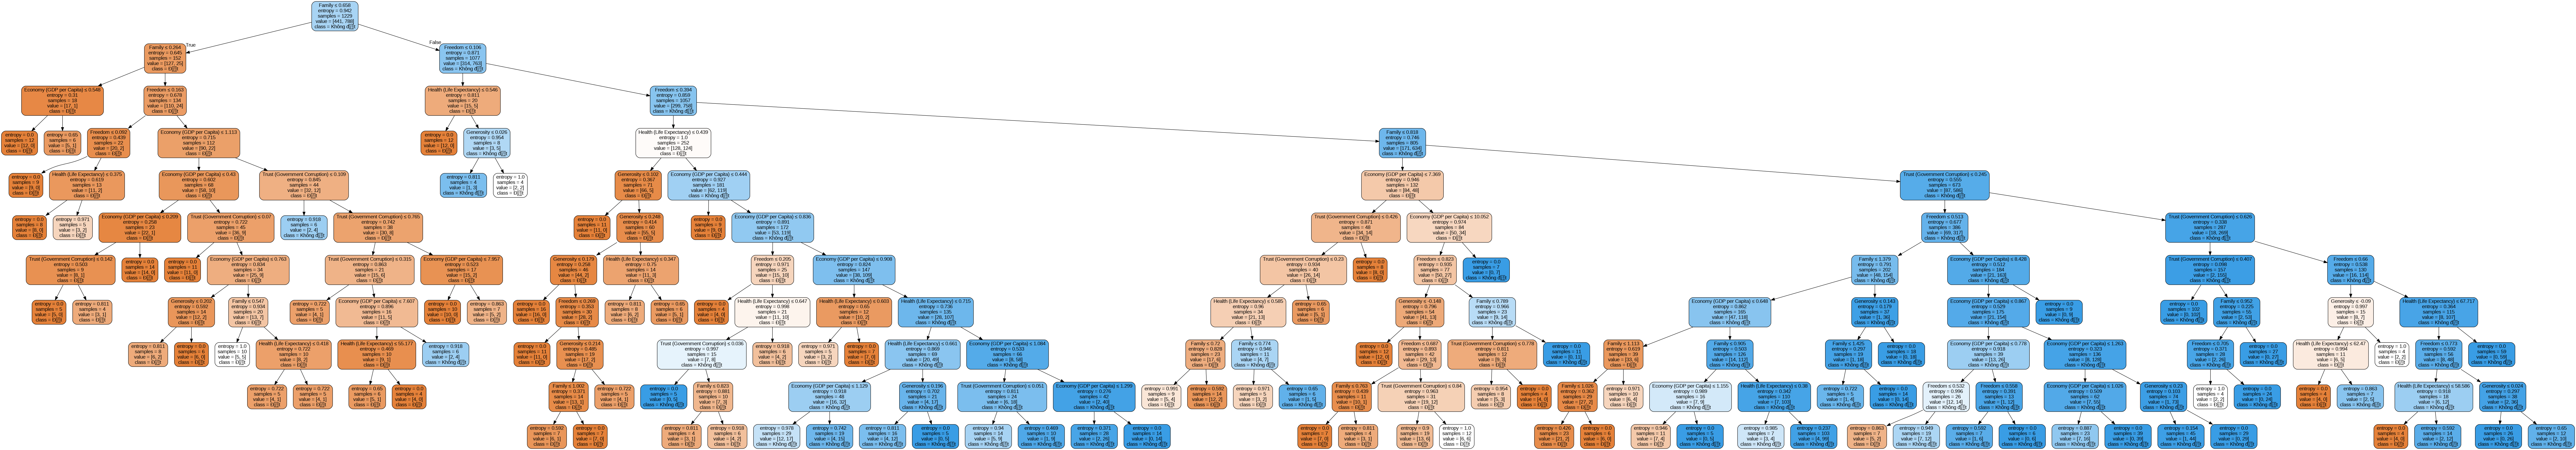

In [ ]:
from google.colab import files
from IPython.display import Image
# uploaded = files.upload()
Image('Decisiontree.csv.png')

# https://colab.research.google.com/github/hukim1112/DLCV_UOS/blob/master/lecture5/2.Image_processing.ipynb